### <span style = 'color:green'> Create a machine learning model that can predict the pulser star </span>


**Support Vector Machines(SVM)**
- Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

**About the dataset**
- Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

**Expected output**
- **Missing values should be treated**
- **Perform Standerdisation and handle outliers**
- **perform Support Vector Mchines and tune the model to increase the efficiency of the model**

- For dataset please click here <a href="https://drive.google.com/file/d/19d2ocdl8d5rrE8Wc8nkBTFu_QrgtDt3q/view?usp=sharing
" title="Google Drive">Click here</a>




In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns 


# Load the dataset
data = pd.read_csv("C:\\Users\\manoj\\OneDrive\\Desktop\\Data Science Files\\SVM.csv")

# Explore the dataset
print(data.head())
print(data.info())


    Mean of the integrated profile  \
0                       121.156250   
1                        76.968750   
2                       130.585938   
3                       156.398438   
4                        84.804688   

    Standard deviation of the integrated profile  \
0                                      48.372971   
1                                      36.175557   
2                                      53.229534   
3                                      48.865942   
4                                      36.117659   

    Excess kurtosis of the integrated profile  \
0                                    0.375485   
1                                    0.712898   
2                                    0.133408   
3                                   -0.215989   
4                                    0.825013   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.013165                   3.168896   
1                        

In [2]:
# Impute missing values using mean or median (choose one)
data.fillna(data.mean(), inplace=True)  # Use mean for imputation

# Check if there are any missing values after handling
print(data.isnull().sum())

# Check and print column names
print(data.columns)


 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64
Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


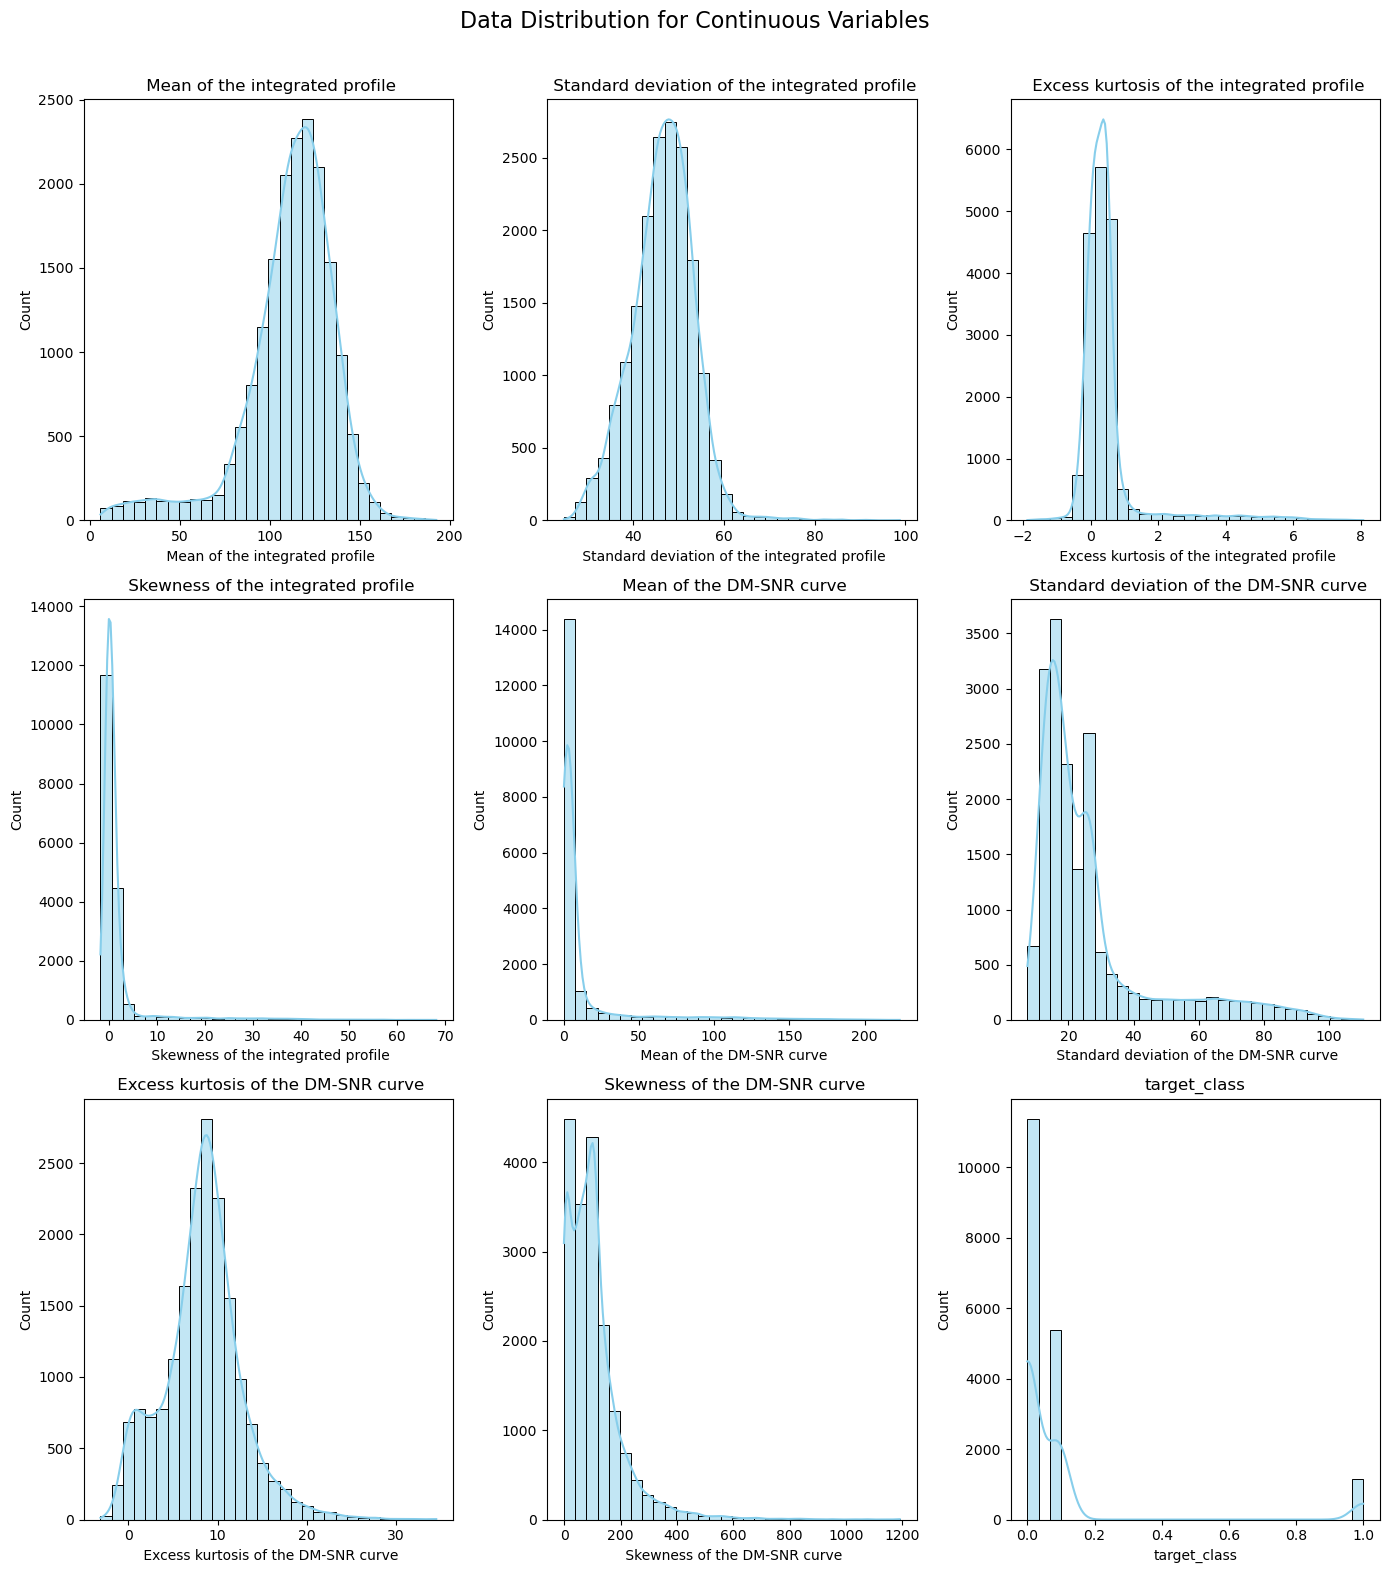

In [3]:
# Select continuous variables for visualization
continuous_variables = [' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class']
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 16))
fig.suptitle('Data Distribution for Continuous Variables', fontsize=16)

# Plot histograms
for i, col in enumerate(continuous_variables):
    row, col_idx = divmod(i, 3)  # Use 3 columns instead of 2
    sns.histplot(data[col], kde=True, ax=axes[row, col_idx], bins=30, color='skyblue')
    axes[row, col_idx].set_title(col)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [4]:
# Calculate descriptive statistics
descriptive_stats = data[continuous_variables].describe()

# Add skewness and kurtosis to the statistics
descriptive_stats.loc['skewness'] = data[continuous_variables].skew()
descriptive_stats.loc['kurtosis'] = data[continuous_variables].kurt()

# Print the descriptive statistics
print(descriptive_stats)


           Mean of the integrated profile  \
count                        17898.000000   
mean                           111.079968   
std                             25.652935   
min                              5.812500   
25%                            100.929688   
50%                            115.078125   
75%                            127.085938   
max                            192.617188   
skewness                        -1.375188   
kurtosis                         2.972374   

           Standard deviation of the integrated profile  \
count                                      17898.000000   
mean                                          46.549532   
std                                            6.843189   
min                                           24.772042   
25%                                           42.376018   
50%                                           46.947479   
75%                                           51.023202   
max                             

In [5]:
# Calculate mean, standard deviation, skewness, and kurtosis for each variable
variable_stats = data[continuous_variables].agg(['mean', 'std', 'skew', 'kurt'])

# Transpose the result for better readability
variable_stats = variable_stats.T

# Rename the columns for clarity
variable_stats.columns = ['Mean', 'Standard Deviation', 'Skewness', 'Kurtosis']

# Print the statistics for each variable
print(variable_stats)


                                                     Mean  Standard Deviation  \
 Mean of the integrated profile                111.079968           25.652935   
 Standard deviation of the integrated profile   46.549532            6.843189   
 Excess kurtosis of the integrated profile       0.480081            0.990846   
 Skewness of the integrated profile              1.770279            6.167913   
 Mean of the DM-SNR curve                       12.614400           29.472897   
 Standard deviation of the DM-SNR curve         26.373476           18.590352   
 Excess kurtosis of the DM-SNR curve             8.303556            4.506092   
 Skewness of the DM-SNR curve                  104.726073          103.991853   
target_class                                     0.092034            0.241857   

                                               Skewness   Kurtosis  
 Mean of the integrated profile               -1.375188   2.972374  
 Standard deviation of the integrated profile  0.12

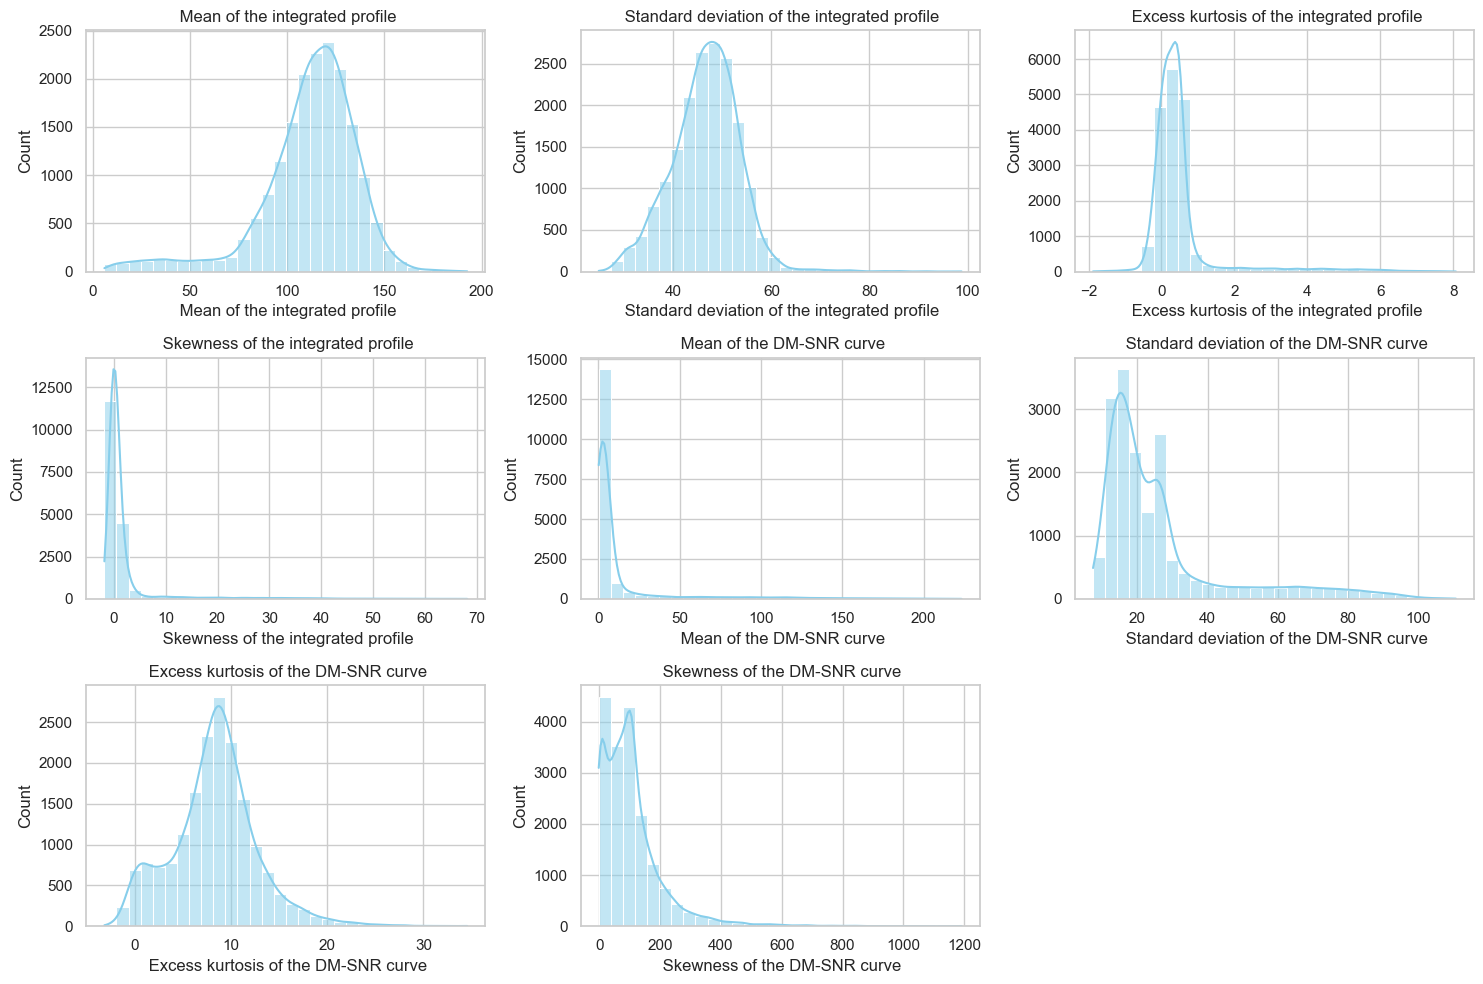

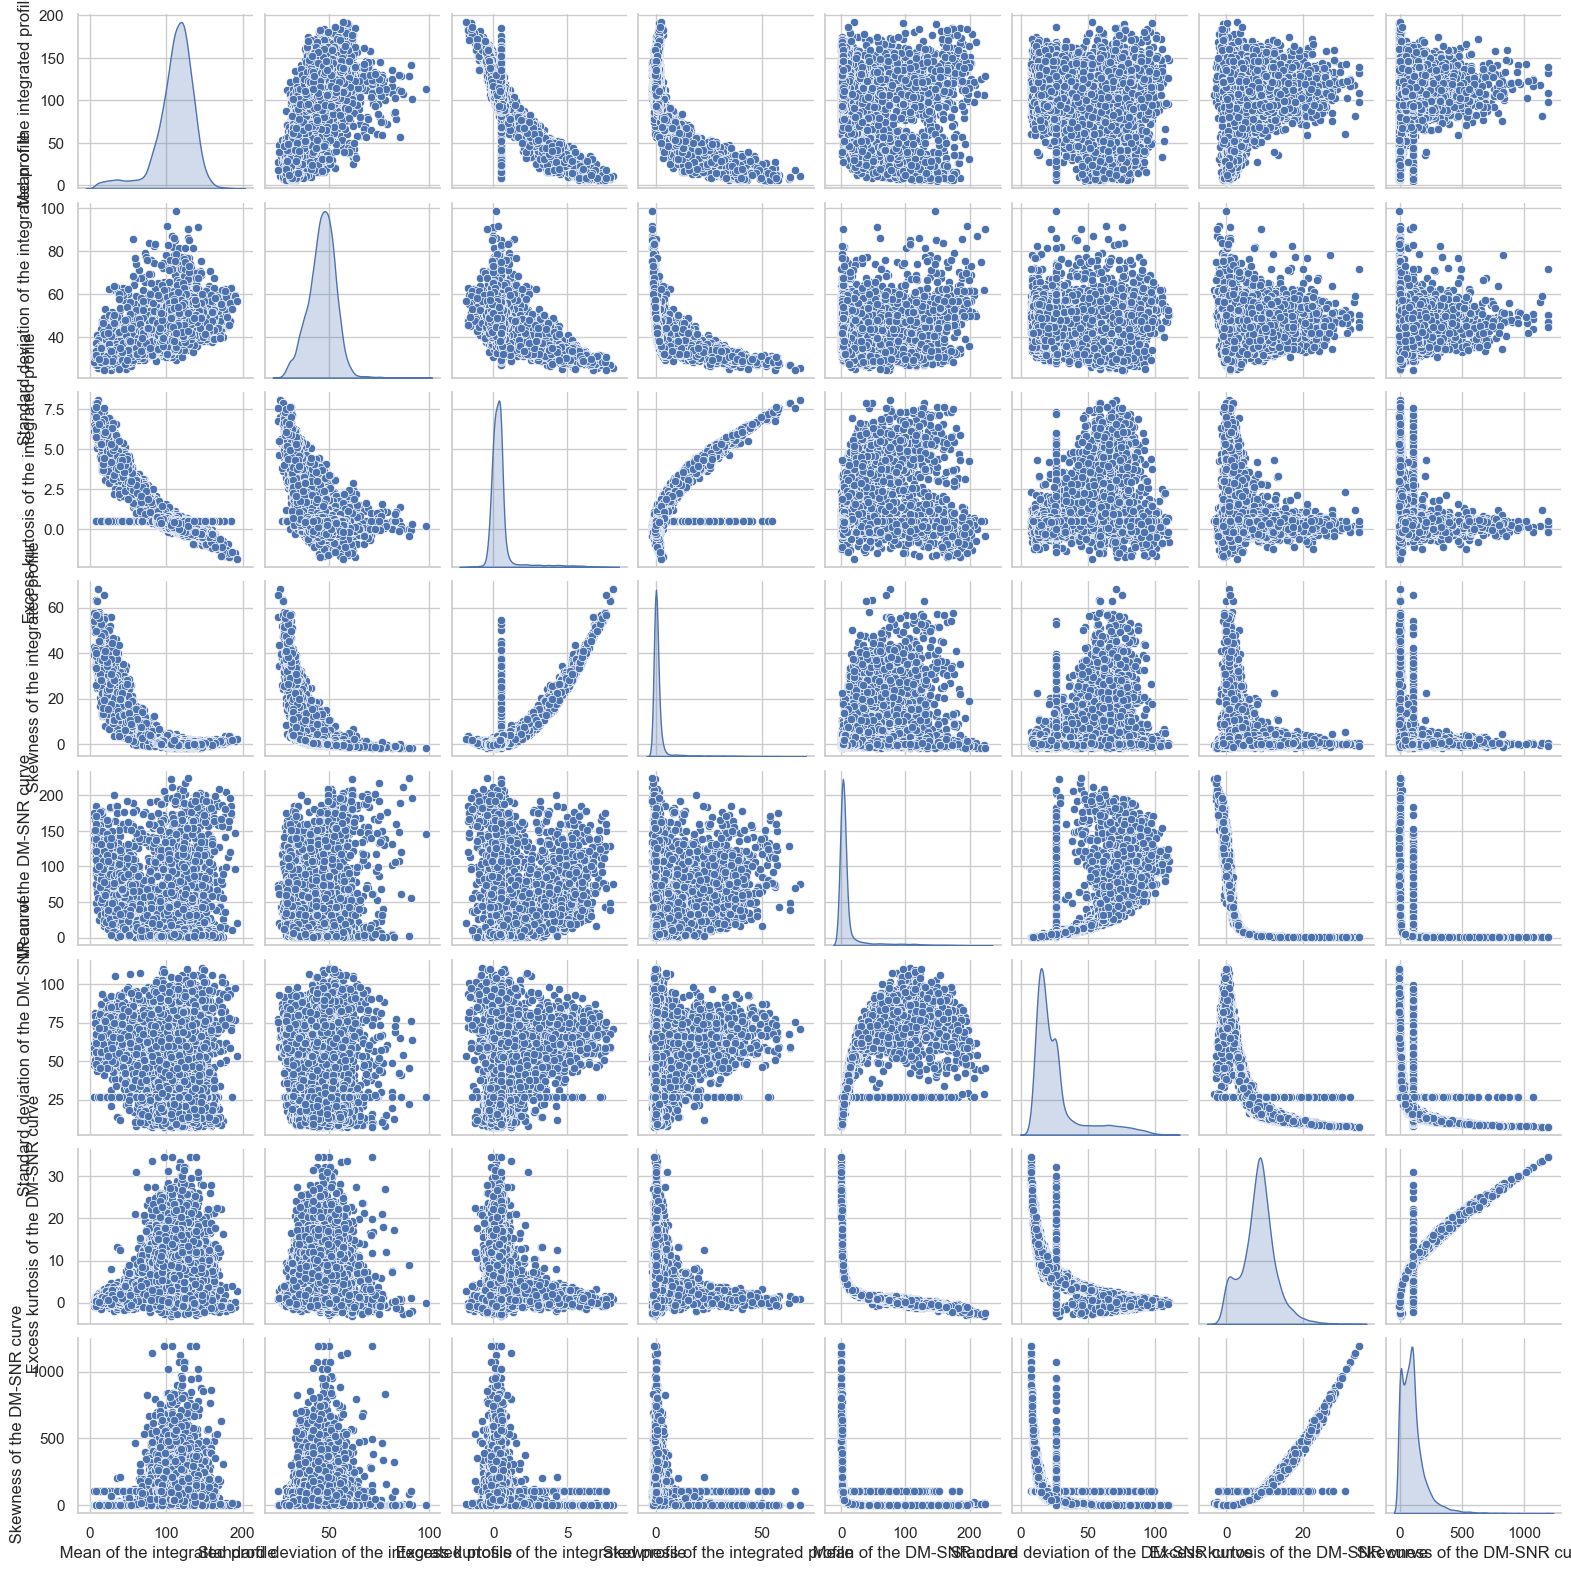

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Select the continuous variables for visualization
continuous_variables = [
    ' Mean of the integrated profile',
    ' Standard deviation of the integrated profile',
    ' Excess kurtosis of the integrated profile',
    ' Skewness of the integrated profile',
    ' Mean of the DM-SNR curve',
    ' Standard deviation of the DM-SNR curve',
    ' Excess kurtosis of the DM-SNR curve',
    ' Skewness of the DM-SNR curve',
]

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_variables):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(col)

# Adjust layout
plt.tight_layout()
plt.show()

# Create a pair plot
sns.pairplot(data[continuous_variables].dropna(), diag_kind='kde', height=2)
plt.show()

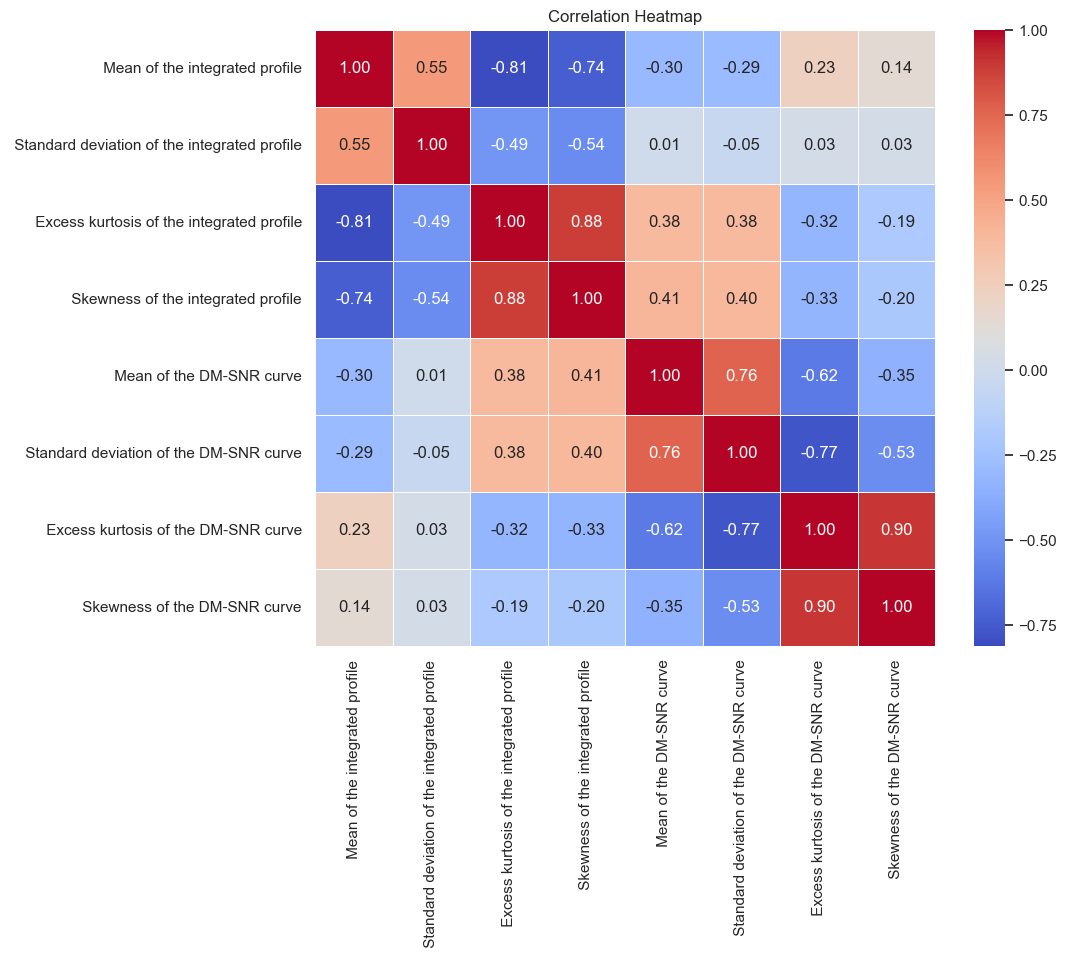

In [7]:
# Calculate the correlation matrix
correlation_matrix = data[continuous_variables].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


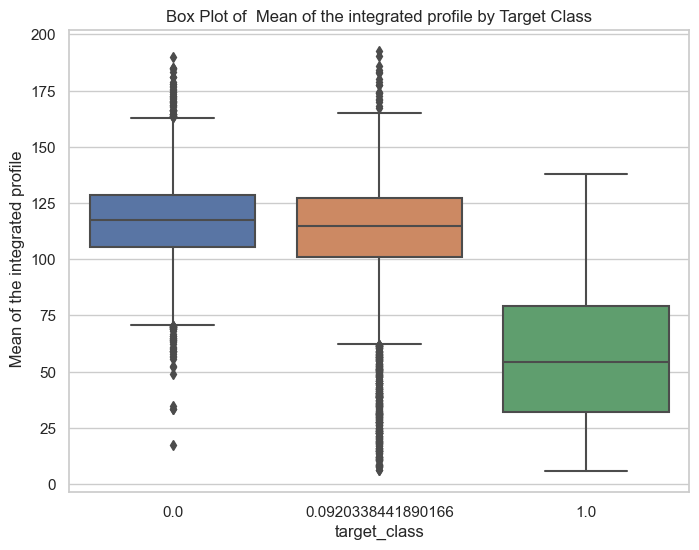

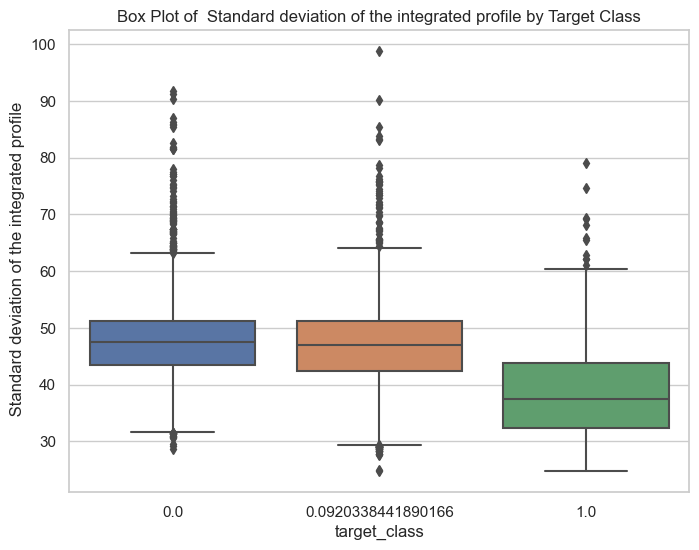

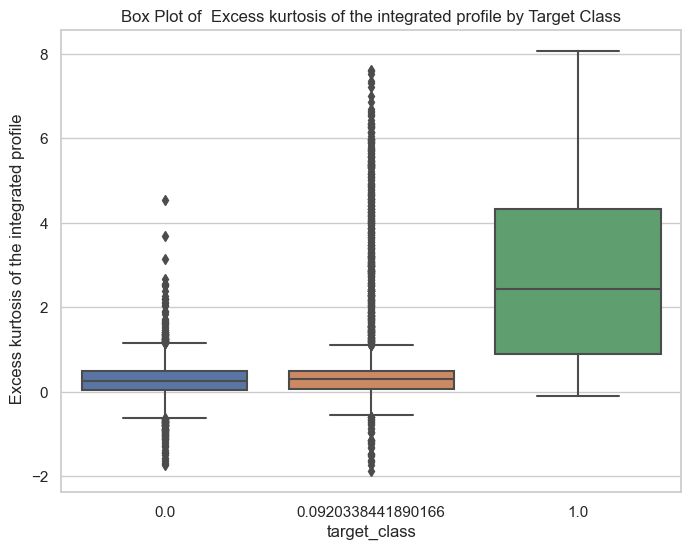

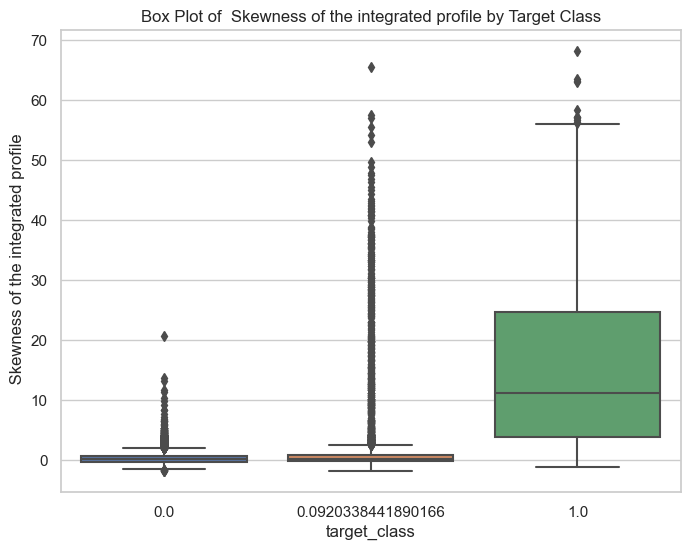

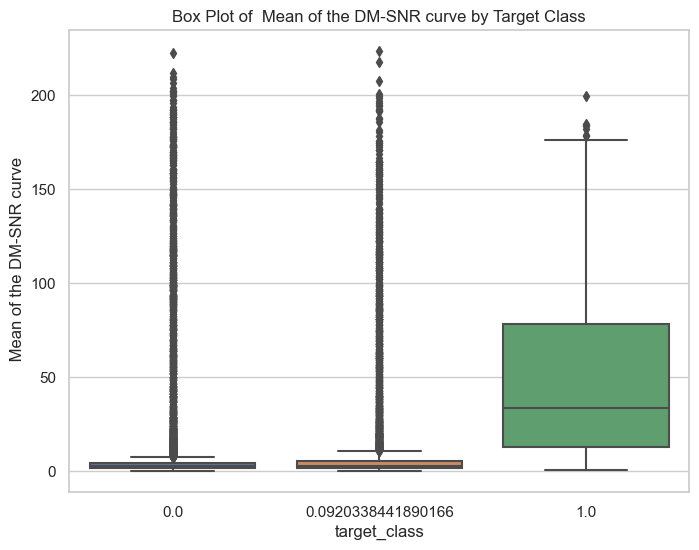

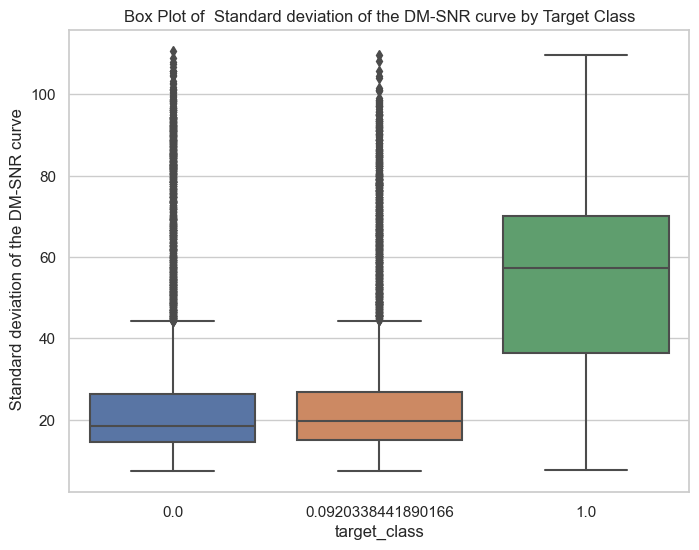

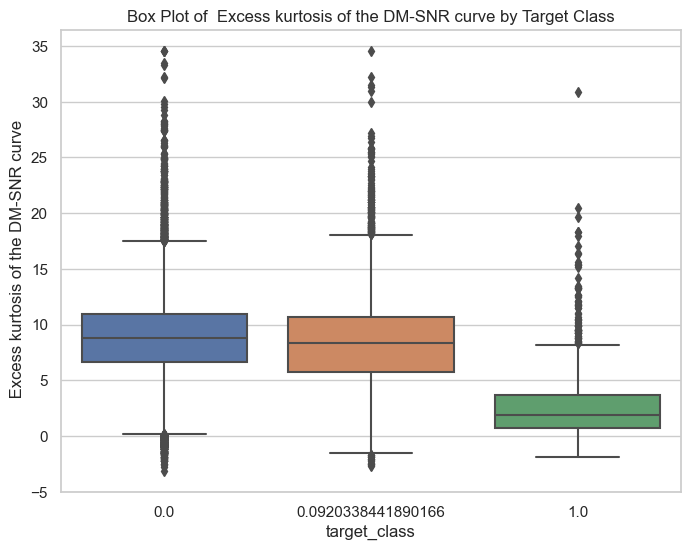

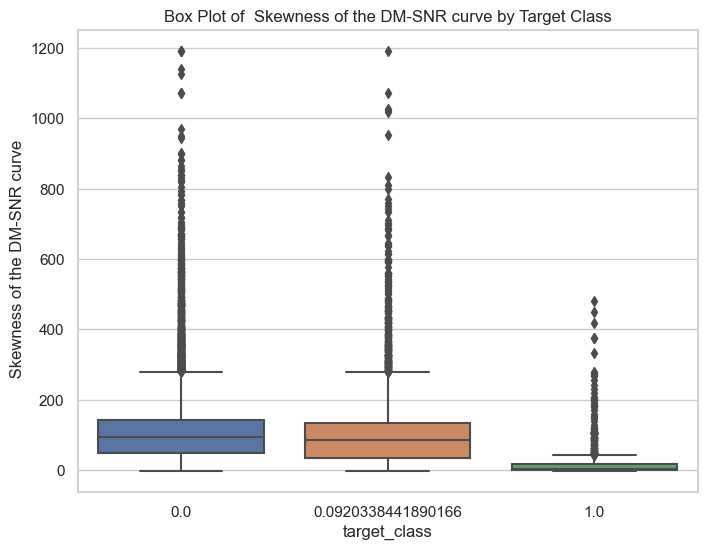

In [8]:
# Box plot for each continuous variable
for col in continuous_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target_class', y=col, data=data)
    plt.title(f'Box Plot of {col} by Target Class')
    plt.show()

In [9]:
from scipy.stats import zscore

# Calculate z-scores for each continuous variable
z_scores = zscore(data[continuous_variables])

# Define a threshold for considering data points as outliers
threshold = 3

# Identify and remove outliers
data_no_outliers = data[(z_scores < threshold).all(axis=1)]
print("Z-scores:\n", z_scores)

Z-scores:
         Mean of the integrated profile  \
0                             0.392804   
1                            -1.329757   
2                             0.760401   
3                             1.766649   
4                            -1.024289   
...                                ...   
17893                         0.212507   
17894                         0.151901   
17895                         0.978157   
17896                        -0.178541   
17897                        -0.015604   

        Standard deviation of the integrated profile  \
0                                           0.266468   
1                                          -1.515998   
2                                           0.976181   
3                                           0.338508   
4                                          -1.524459   
...                                              ...   
17893                                       0.670866   
17894                               

In [10]:
# Logarithmic transformation
data[continuous_variables] = data[continuous_variables].apply(np.log1p)

In [11]:
# Winsorize the data
from scipy.stats.mstats import winsorize

data_winsorized = data.copy()
data_winsorized[continuous_variables] = winsorize(data[continuous_variables].values, limits=[0.05, 0.05])


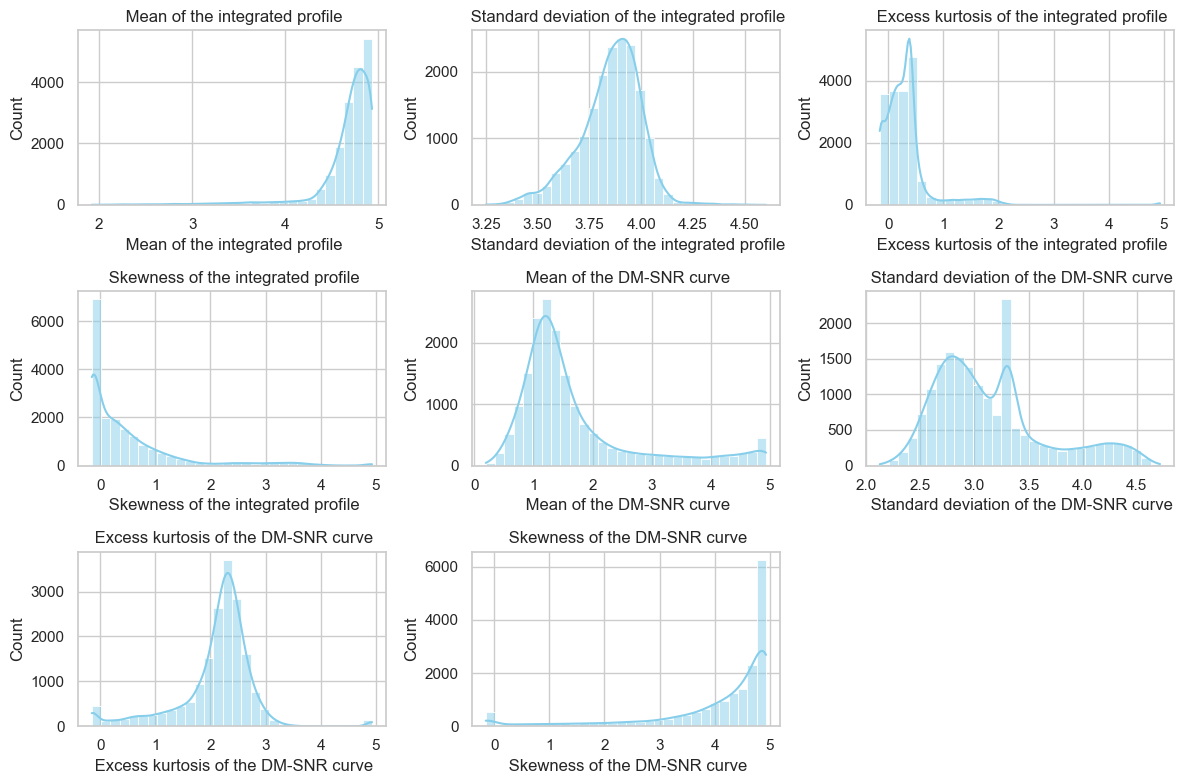

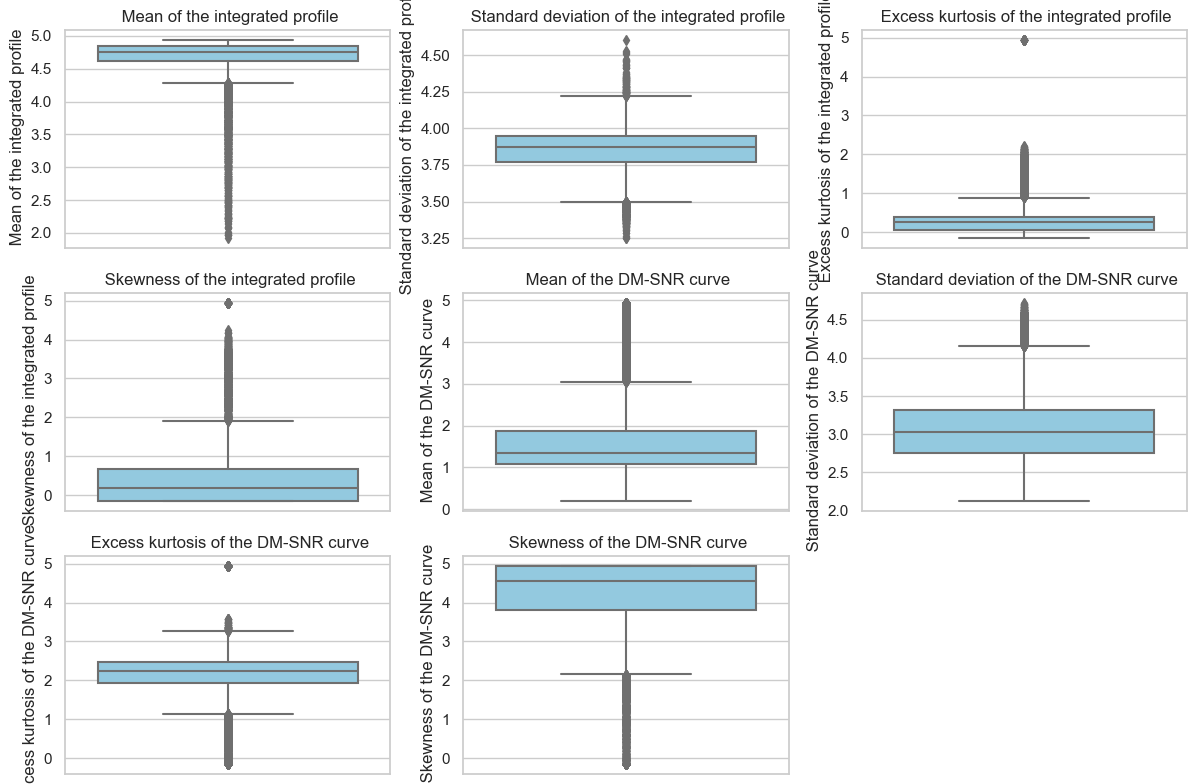

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(continuous_variables):
    plt.subplot(3, 3, i+1)
    sns.histplot(data_winsorized[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(continuous_variables):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=data_winsorized[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

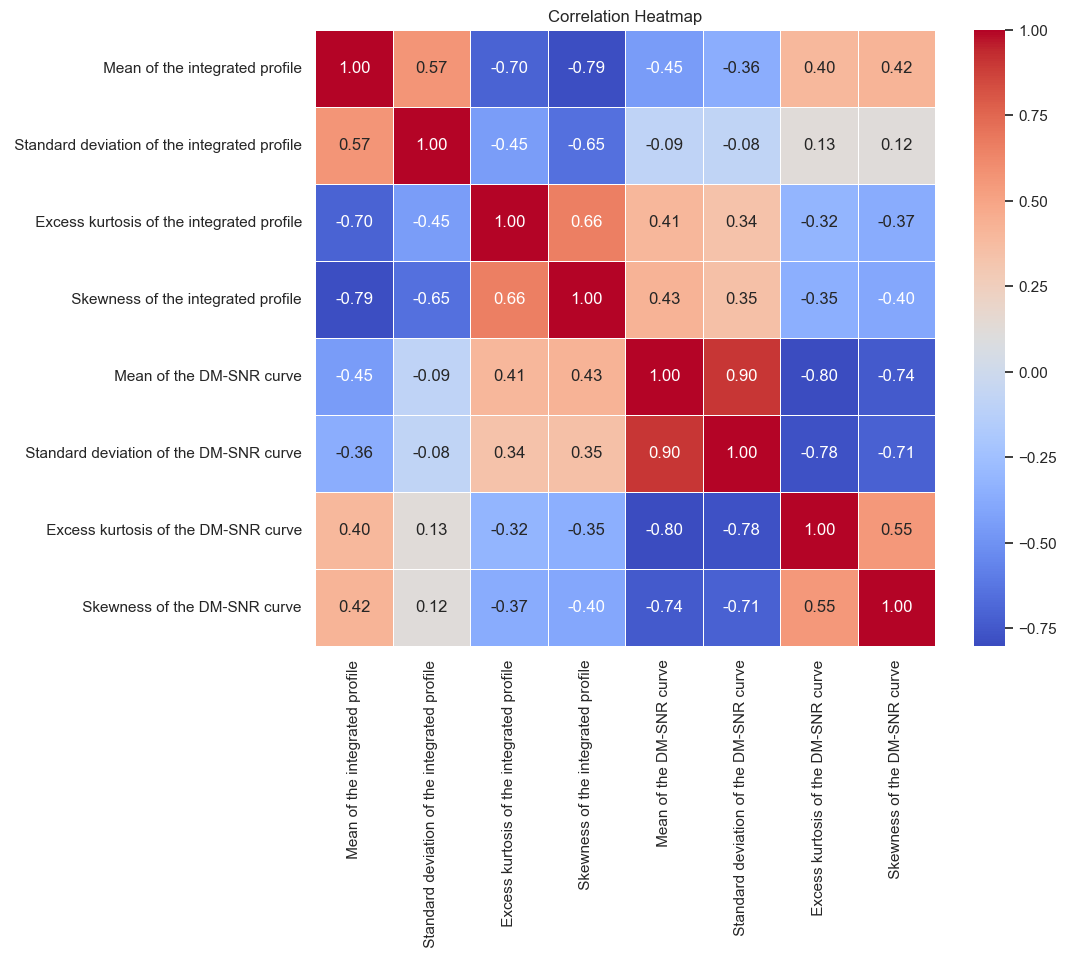

In [13]:
# Correlation Heatmap
correlation_matrix = data_winsorized[continuous_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Choose the scaling method
# scaler = MinMaxScaler()
scaler = StandardScaler()

# Apply scaling to continuous variables
data_scaled = data_winsorized.copy()
data_scaled[continuous_variables] = scaler.fit_transform(data_winsorized[continuous_variables])


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data_scaled.drop("target_class", axis=1)
y = data_scaled["target_class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Check if there are any missing values after handling
print(data_scaled.isnull().sum())

# If there are still missing values, handle them using an imputer or another method
# For example, you can use the mean imputation for missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
data_scaled_imputed = pd.DataFrame(imputer.fit_transform(data_scaled), columns=data_scaled.columns)

# Now, split the data again and proceed with model training
X = data_scaled_imputed.drop("target_class", axis=1)
y = data_scaled_imputed["target_class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


In [19]:
import pandas as pd

# Load your CSV data into the 'data' variable
data = pd.read_csv("C:\\Users\\manoj\\OneDrive\\Desktop\\Data Science Files\\SVM.csv")

# Impute missing values with the mean of each column
data_imputed = data.fillna(data.mean())

# Convert 'target_class' column to numeric
data_imputed['target_class'] = pd.to_numeric(data_imputed['target_class'])

# Create a binary target variable based on a threshold
threshold = 0.5
data_imputed['binary_target'] = (data_imputed['target_class'] > threshold).astype(int)


# Split the data
X_binary = data_imputed.drop(["target_class", "binary_target"], axis=1)
y_binary = data_imputed["binary_target"]

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Train the model
dt_model_binary = DecisionTreeClassifier(random_state=42)
dt_model_binary.fit(X_train_binary, y_train_binary)

# Make predictions
y_pred_binary = dt_model_binary.predict(X_test_binary)

# Evaluate the model
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
classification_report_result_binary = classification_report(y_test_binary, y_pred_binary)

print("Accuracy:", accuracy_binary)
print("\nClassification Report:\n", classification_report_result_binary)


Accuracy: 0.9494413407821229

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3357
           1       0.59      0.60      0.60       223

    accuracy                           0.95      3580
   macro avg       0.78      0.78      0.78      3580
weighted avg       0.95      0.95      0.95      3580



In [20]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_binary, y_train_binary)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model from the grid search
best_dt_model = grid_search.best_estimator_

# Make predictions
y_pred_best = best_dt_model.predict(X_test_binary)

# Evaluate the best model
accuracy_best = accuracy_score(y_test_binary, y_pred_best)
classification_report_result_best = classification_report(y_test_binary, y_pred_best)

print("Best Model Accuracy:", accuracy_best)
print("\nBest Model Classification Report:\n", classification_report_result_best)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Model Accuracy: 0.9639664804469273

Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3357
           1       0.68      0.80      0.74       223

    accuracy                           0.96      3580
   macro avg       0.83      0.89      0.86      3580
weighted avg       0.97      0.96      0.97      3580



In [21]:
feature_importance = best_dt_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_binary.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                                         Feature  Importance
2      Excess kurtosis of the integrated profile    0.790437
3             Skewness of the integrated profile    0.137435
7                   Skewness of the DM-SNR curve    0.021027
5         Standard deviation of the DM-SNR curve    0.020172
1   Standard deviation of the integrated profile    0.014073
0                 Mean of the integrated profile    0.009653
6            Excess kurtosis of the DM-SNR curve    0.004574
4                       Mean of the DM-SNR curve    0.002629


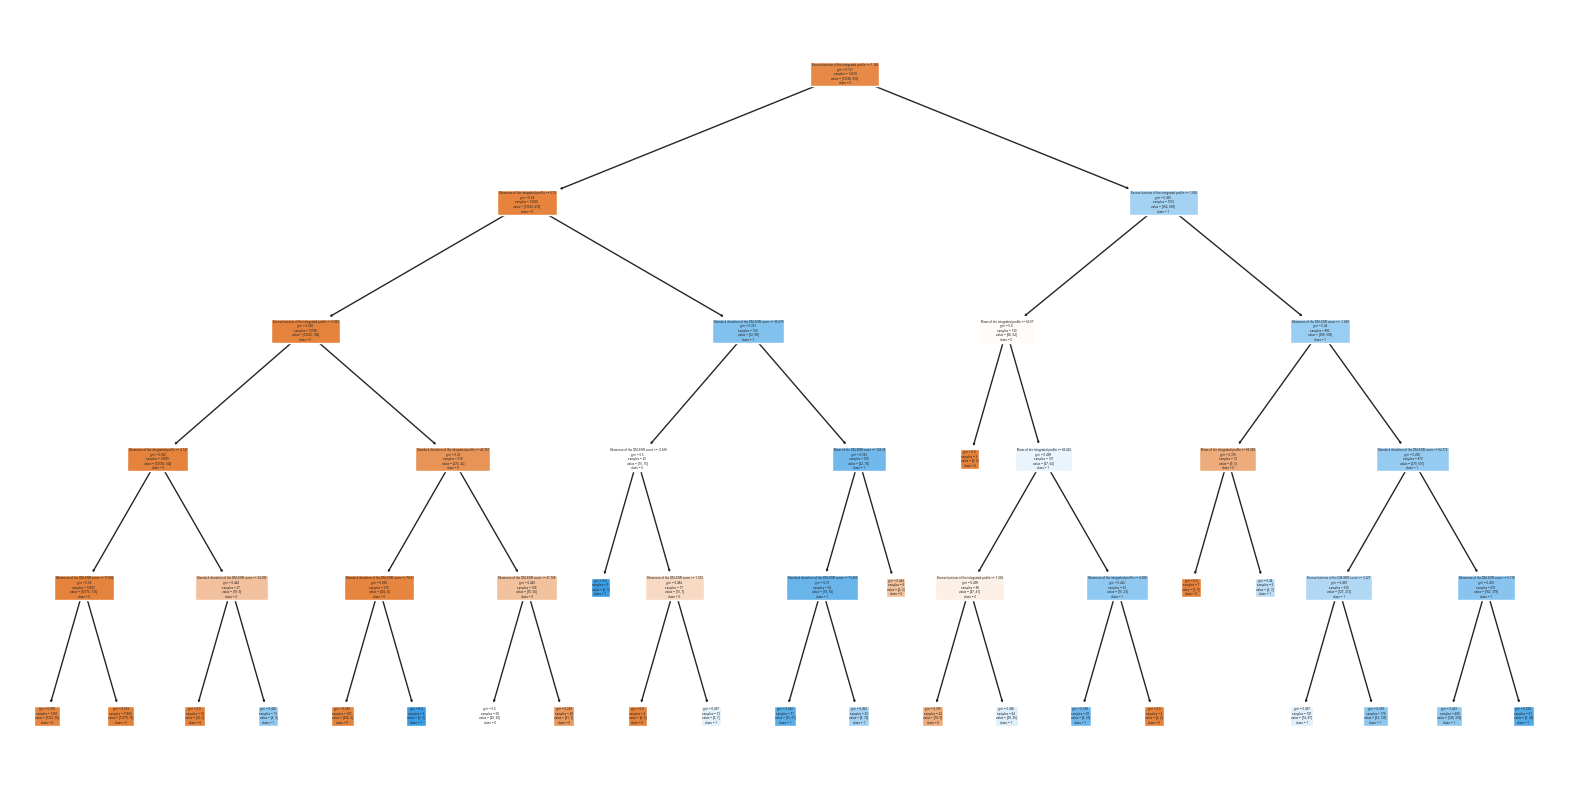

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, feature_names=X_train_binary.columns, class_names=['0', '1'], filled=True)
plt.show()


Confusion Matrix:
 [[3272   85]
 [  44  179]]


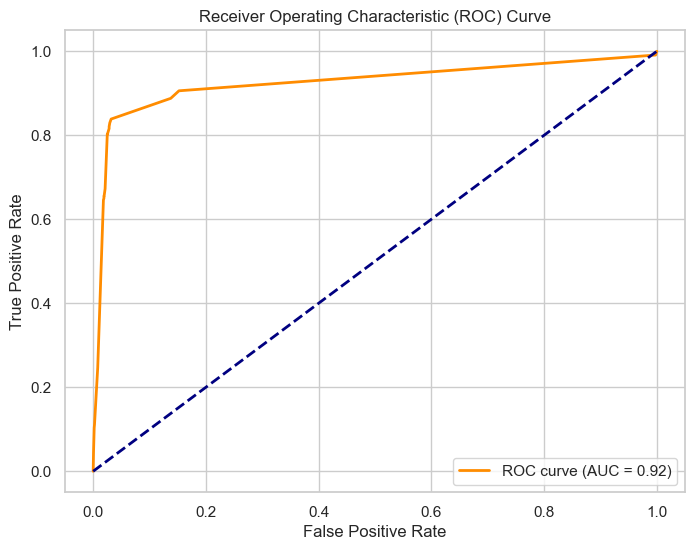

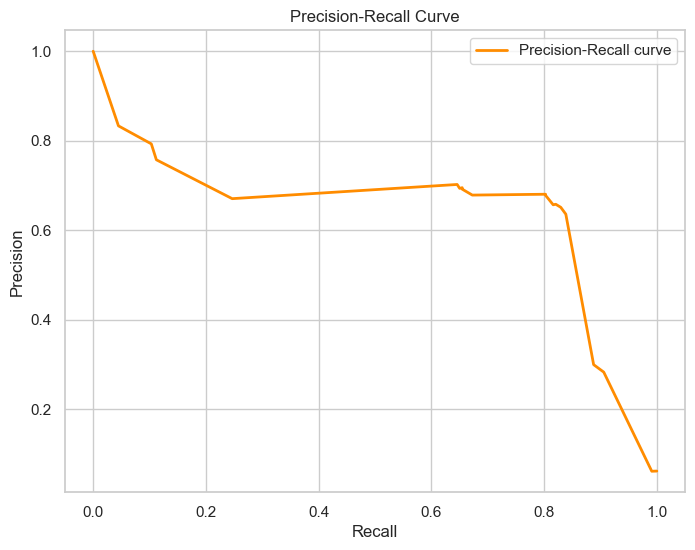

In [23]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_best)
print("Confusion Matrix:\n", cm)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_binary, best_dt_model.predict_proba(X_test_binary)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_binary, best_dt_model.predict_proba(X_test_binary)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


In [24]:
# We have a trained Decision Tree model 'best_dt_model'
feature_importance = best_dt_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_binary.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                                         Feature  Importance
2      Excess kurtosis of the integrated profile    0.790437
3             Skewness of the integrated profile    0.137435
7                   Skewness of the DM-SNR curve    0.021027
5         Standard deviation of the DM-SNR curve    0.020172
1   Standard deviation of the integrated profile    0.014073
0                 Mean of the integrated profile    0.009653
6            Excess kurtosis of the DM-SNR curve    0.004574
4                       Mean of the DM-SNR curve    0.002629


In [25]:
from sklearn.model_selection import train_test_split

# We have already performed data preprocessing
# Split the data into features (X) and target variable (y)
X = data_scaled.drop("target_class", axis=1)
y = data_scaled["target_class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
print(y_train.unique())
print(y_test.unique())


[0.09203384 0.         1.        ]
[0.09203384 0.         1.        ]


In [27]:
# Assuming 'target_class' is the column you want to predict
threshold = 0.5
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

In [28]:
# Train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train_binary)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test_binary, y_pred_svm)
classification_report_svm = classification_report(y_test_binary, y_pred_svm)

print("SVM Model Accuracy:", accuracy_svm)
print("\nSVM Model Classification Report:\n", classification_report_svm)


SVM Model Accuracy: 0.9664804469273743

SVM Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3357
           1       0.70      0.80      0.75       223

    accuracy                           0.97      3580
   macro avg       0.85      0.89      0.86      3580
weighted avg       0.97      0.97      0.97      3580

